---
title: "Week 6: Harmony and melody"
subtitle: "Exploring harmony, melody, and musical structure"
authors: 
  - name: Alexander Refsum Jensenius
    affiliation: 
      - University of Oslo
description: "This notebook explores the concepts of harmony, melody, and musical structure through both theoretical explanations and practical visualizations. It covers fundamental audio representations, symbolic music formats, and provides code examples for analyzing and visualizing musical elements using Python."
exports:
  - format: pdf
---

Last week, we explored the importance of timing and rhythm in sound and music. This week, our focus shifts to how frequencies interact both "horizontally" and "vertically." Horizontal organization of frequencies gives rise to melodies; sequences of pitches unfolding over time, often shaped by rhythmic patterns. Vertical organization, on the other hand, leads to the formation of intervals, harmonies, and textures, as multiple pitches sound together or overlap. Understanding these dimensions is essential for analyzing how music conveys structure, emotion, and complexity. First, however, we need to define the concept of "tone".

## Tones

In music psychology, a *tone* is understood as a sound with a specific frequency and timbral quality that the auditory system interprets as having a definite pitch. Our perception of tones is shaped by both the physical properties of the sound wave (such as frequency, amplitude, and harmonic content) and the way our brains process these signals. Tones are the building blocks of musical perception, allowing us to distinguish melodies, harmonies, and timbres.

From a technological perspective, tones can be generated, analyzed, and manipulated using digital tools. Synthesizers create tones by combining waveforms, while audio analysis software can extract pitch and timbre features from recordings. Technologies such as pitch detection algorithms and spectral analysis are essential for applications in music information retrieval, automatic transcription, and digital instrument design.

In [ ]:
import numpy as np

sr = 22050  # or whatever sample rate you are using
duration = 2.0  # seconds, or whatever duration you want
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

# Define a fundamental frequency
f0 = 440  # A4, 440 Hz

# Pure tone (sine wave)
pure = np.sin(2 * np.pi * f0 * t)

# Harmonics (sum of first 5 harmonics)
harmonics = sum([np.sin(2 * np.pi * f0 * (n+1) * t) / (n+1) for n in range(5)])

# Complex tone (sum of odd harmonics, like a square wave)
complex_tone = sum([np.sin(2 * np.pi * f0 * (2*n+1) * t) / (2*n+1) for n in range(5)])

# Set new envelope times (in seconds)
attack_time = 0.01   # very rapid attack
decay_time = 0.02    # very rapid decay
sustain_time = 0.9   # much longer sustain
release_time = 0.2   # longer release

# Convert times to sample lengths
attack_len = int(attack_time * sr)
decay_len = int(decay_time * sr)
sustain_len = int(sustain_time * sr)
release_len = int(release_time * sr)

# Create envelope with decay going down to 0.2
attack = np.linspace(0, 1, attack_len, endpoint=False)                    # Attack
decay = np.linspace(1, 0.2, decay_len, endpoint=False)                    # Decay (to 0.2)
sustain = np.full(sustain_len, 0.2)                                       # Sustain
release = np.linspace(0.2, 0, release_len, endpoint=True)                 # Release

envelope = np.concatenate([attack, decay, sustain, release])

# Ensure envelope matches signal length
if len(envelope) < len(t):
    envelope = np.concatenate([envelope, np.zeros(len(t) - len(envelope))])
else:
    envelope = envelope[:len(t)]

# Apply envelope to signals (assuming pure, harmonics, complex_tone are numpy arrays)
pure_env = pure * envelope
harmonics_env = harmonics * envelope
complex_tone_env = complex_tone * envelope
signals_env = [pure_env, harmonics_env, complex_tone_env]

Tones are not the same as notes: while a *note* refers to a symbolic representation in musical notation (with defined pitch, duration, and sometimes dynamics), a *tone* refers to the auditory experience itself.

:::{note}
In the following, we will use an [analysis-by-synthesis](https://en.wikipedia.org/wiki/Analysis_by_synthesis) technique to understand more about the different concepts. This is a method used in sound and music research to understand auditory perception by recreating sounds and analyzing their properties. This approach is widely used in areas like speech synthesis, sound design, and music analysis.
:::

Changing working directory to: `/tmp/music21'
Processing `/tmp/music21/tmplwsgg5xf.ly'
Parsing...
/tmp/music21/tmplwsgg5xf.ly:25:5: error: unknown escaped string: `\RemoveEmptyStaffContext'
    
    \RemoveEmptyStaffContext
/tmp/music21/tmplwsgg5xf.ly:26:5: error: syntax error, unexpected \override, expecting '='
    
    \override VerticalAxisGroup #'remove-first = ##t
/tmp/music21/tmplwsgg5xf.ly:26:33: warning: deprecated: missing `.' in property path VerticalAxisGroup.remove-first
    \override VerticalAxisGroup 
                                #'remove-first = ##t
/tmp/music21/tmplwsgg5xf.ly:28:2: error: syntax error, unexpected '}'
 
 }
/tmp/music21/tmplwsgg5xf.ly:28:3: error: Unfinished main input
 }
  
Interpreting music...
Preprocessing graphical objects...
Calculating line breaks... 
Drawing systems... 
Converting to PNG...
fatal error: failed files: "/tmp/music21/tmplwsgg5xf.ly"


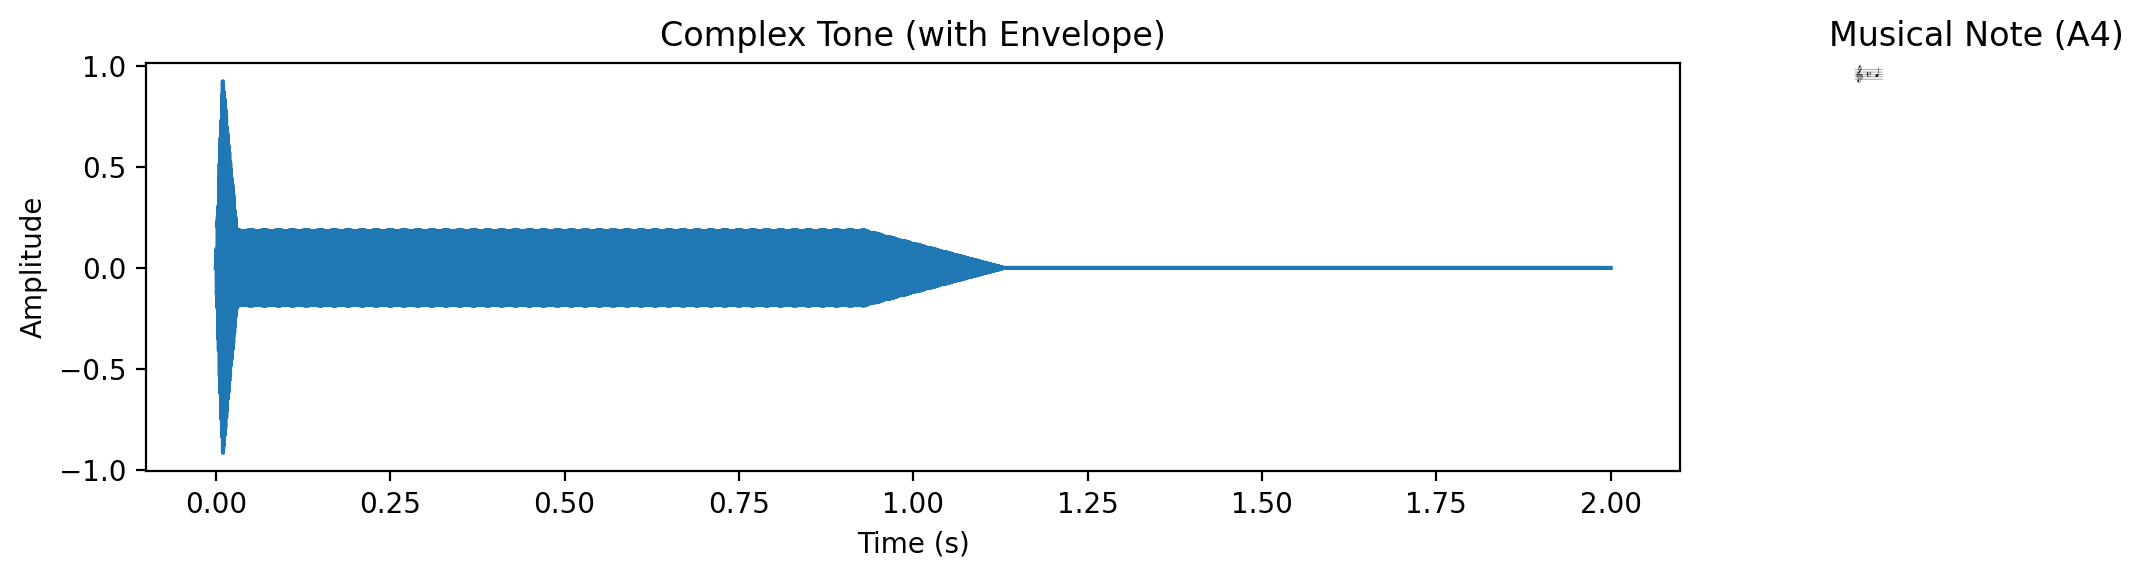

In [14]:
import music21

import matplotlib.pyplot as plt

# Plot the complex tone waveform
fig, axs = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'width_ratios': [2, 1]})

# Waveform plot
axs[0].plot(t, complex_tone_env)
axs[0].set_title('Complex Tone (with Envelope)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Create a single musical note (e.g., A4)
note = music21.note.Note('A4')
note.quarterLength = 1.0
stream = music21.stream.Stream([note])

# Render the musical note in the second subplot (as an image)
# Save the note as an image and display it
img_path = stream.write('lily.png')
img = plt.imread(img_path)
axs[1].imshow(img)
axs[1].axis('off')
axs[1].set_title('Musical Note (A4)')

plt.tight_layout()
plt.show()

## Pitch

*Pitch* is the psycho-physiological correlate of frequency that lets us hear one sound as higher or lower than another. It is closely related to frequency---the rate at which a waveform repeats---but the relationship is not one-to-one. As you may recall from the Acoustics chapter, most instrument tones are not pure sine waves. Musical, 'pitched' instruments generally produce a fundamental frequency and many additional frequencies (overtones). This is because pitched musical instruments are often based on an acoustic resonator, which oscillates at numerous frequencies simultaneously, mostly limited to integer multiples, or harmonics, of the lowest (fundamental) frequency, and such multiples form a harmonic series. However, the individual partials of a complex sound are typically not perceived as separate; our perceptual system fuses them together, leading us to experience a unitary sound

The pitch of harmonic tones generally corresponds to the fundamental frequency (f₀). However, the brain can infer a fundamental frequency (and thus perceive pitch) from complex tones even when a fundamental component is absent. This is called *virtual pitch* or the *missing fundamental* and it is related to the phenomenon whereby one's brain extracts tones from everyday signals, even if parts of the signal are masked by other sounds

Below is a sequence of simple (sine) tones distinct at different frequencies ([[Audio Ex. 1]{.underline}](https://www.dropbox.com/scl/fo/8qfuvsu1s5cl8odnbdo0x/AAQZOn7PITdCyytloI_yAnI?rlkey=gv9isblfijwhavfqd6u2uapt2&dl=0)).

![](figures/week6_image2.png)

If we add some partials (multiples) below each tone ([Audio example 2](https://www.dropbox.com/scl/fo/8qfuvsu1s5cl8odnbdo0x/AAQZOn7PITdCyytloI_yAnI?rlkey=gv9isblfijwhavfqd6u2uapt2&dl=0)), can you start to hear a familiar melody?

![](figures/week6_image4.png)

If we then rearrange these partials slightly ([[Audio Example 3]{.underline}](https://www.dropbox.com/scl/fo/8qfuvsu1s5cl8odnbdo0x/AAQZOn7PITdCyytloI_yAnI?rlkey=gv9isblfijwhavfqd6u2uapt2&dl=0)), we can induce an even stronger sense of virtual pitch---various missing fundamental frequencies which are not physically present in the tones themselves:

![](figures/week6_image1.png)

*Image source*: Toiviainen, P. (2015). Lecture materials for Music Perception. University of Jyväskylä.

### Pitch class

In music, a pitch class (or "chroma") is a set of pitches that are a whole number of octaves apart, e.g., the pitch class C consists of the Cs in all octaves. Humans perceive the notes in a tonal scale as repeating once per octave. This provides the basis for producing & perceiving melodic patterns based on relative pitch relationships---that is, *relative* to a pitch class. Absolute pitch ability, on the other hand, is the ability to recognize (or reproduce) specific pitches without the help of a reference pitch and pitch class.

![](figures/week6_image3.png)

*Image Source*: Trainor, Laurel & Unrau, A.J.. (2012). Development of pitch and music perception. Springer Handbook of Auditory Research: Human Auditory Development. 223-254.

### Tonality and harmonic expectation

*Tonality* refers to the tendency for tones to resolve to a fundamental tonic note---a hierarchy of tones centered on a tonic (scale). It is pne of the main conceptual categories in Western music & musical thought, and corresponds to *key signatures* in musical notation (C major, C minor). Some tones feel stable in a melodic-harmonic sequence or scale, others seem to want to resolve. Knowledge of tonality does not require formal training in music theory---it is learned implicitly, by virtue of exposure to the music of one's culture. This learning-by-exposure causes us to store knowledge about key as a cognitive schema. Tonality is also supported by acoustics, in the sense that the most crucial notes in a scale (3rd and 5th) tend to share partials with the tonic.

## Harmony

[Harmony](https://en.wikipedia.org/wiki/Harmony) involves the combination of discernible tones to create intervals and chords. It is the simultaneous sounding of different pitches, which can evoke a wide range of emotional responses. Harmony plays a crucial role in the emotional tone and complexity of music. Harmony encompasses the interaction of pitches through intervals and chords, shaped by timbre and texture. 

### Intervals

An *interval* is the distance between two pitches, measured in steps or frequency ratios. Intervals are the building blocks of harmony, as they define the relationships between notes played together or in succession. The human brain is sensitive to the relationships between pitches, perceiving certain combinations as consonant (pleasant or stable) and others as dissonant (tense or unstable). These perceptual responses are influenced by cultural exposure, musical training, and innate auditory processing mechanisms.

- **Types of Intervals:** Intervals are named by counting the number of letter names from the lower to the higher note (e.g., C to E is a third). They can be major, minor, perfect, augmented, or diminished.
- **Consonance and Dissonance:** Some intervals, like octaves and perfect fifths, are perceived as consonant, while others, like minor seconds or tritones, are more dissonant.
- **Role in Harmony:** Intervals form the basis for chords and harmonic progressions. The combination of intervals within a chord determines its character and function.


### Chords

A *chord* is a group of three or more notes played simultaneously. Chords are the foundation of Western harmony and are used to create progressions that define the structure and mood of a piece.

- **Triads:** The most basic chords, consisting of three notes (root, third, fifth). Types include major, minor, diminished, and augmented triads.
- **Seventh Chords and Extensions:** Adding more notes (such as sevenths, ninths, elevenths, and thirteenths) creates richer harmonies.
- **Chord Progressions:** Sequences of chords that create movement and tension-resolution patterns in music (e.g., I–IV–V–I in classical music, or ii–V–I in jazz).
- **Functional Harmony:** Chords have roles (tonic, dominant, subdominant) that guide the listener’s expectations.

### Timbre

Recall that [timbre](https://en.wikipedia.org/wiki/Timbre), often called "sound color," is the quality of a sound that distinguishes different instruments or voices, even when they produce the same pitch and loudness.

- **"Sound Color":** The unique quality that makes a violin sound different from a flute, even if both play the same note at the same loudness.
- **Spectral Content:** Timbre is shaped by the harmonic content (overtones) and the way energy is distributed across frequencies.
- **Temporal Alignment:** The timing of sound waves, including attack, decay, sustain, and release, contributes to timbre perception.
- **Just Noticeable Differences (JND):** The smallest change in a sound property (such as frequency, amplitude, or spectral content) that can be perceived.


### Texture

[Texture](https://en.wikipedia.org/wiki/Texture_(music)) describes how multiple layers of sound interact in a musical composition. It ranges from monophonic (a single melody) to polyphonic (multiple independent melodies).

- **Monophonic Texture:** A single melodic line without accompaniment (e.g., solo singing).
- **Homophonic Texture:** A main melody supported by chords or accompaniment (e.g., singer with guitar).
- **Polyphonic Texture:** Two or more independent melodies played simultaneously (e.g., fugues, counterpoint).
- **Heterophonic Texture:** Multiple performers play variations of the same melody at the same time.
- **Combination of Timbres:** The blending of different sound qualities to create a rich texture.


## Melody

[Melody](https://en.wikipedia.org/wiki/Melody) is the sequence of musical notes that are perceived as a single entity. It is often the most recognizable and memorable aspect of a musical piece. Melody plays a crucial role in emotional engagement and memory recall. Tools like MIDI editors and pitch detection algorithms are used to analyze and manipulate melodies.


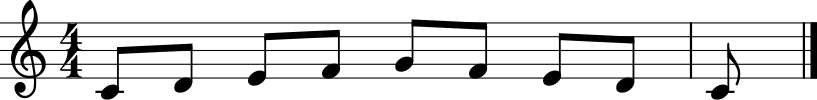

In [5]:
import music21
music21.environment.UserSettings()['musescoreDirectPNGPath'] = '/usr/bin/mscore3'

# Create a simple melody: C D E F G F E D C
melody_notes = ['C4', 'D4', 'E4', 'F4', 'G4', 'F4', 'E4', 'D4', 'C4']
melody = music21.stream.Stream()
for n in melody_notes:
    melody.append(music21.note.Note(n, quarterLength=0.5))

# Show the musical score (this will render in Jupyter if MuseScore or similar is installed)
melody.show()


From a psychological perspective, *melody* is the perception of a coherent sequence of tones that form a recognizable musical line. Melodies are central to musical memory and emotional response, as the brain tracks pitch contours, intervals, and rhythmic patterns to identify and recall tunes. Research in music cognition explores how listeners segment, remember, and anticipate melodic sequences.

Technological advances have enabled detailed analysis and manipulation of melody. Pitch tracking algorithms extract melodic lines from audio, while MIDI editors and music notation software allow for precise editing and visualization. In music generation and AI composition, models learn melodic patterns from large datasets to create new, stylistically consistent melodies. Melody extraction and similarity algorithms are also used in music search and recommendation systems.

### Auditory stream segregation

Auditory stream segregation is the process by which the human auditory system organizes complex mixtures of sounds into perceptually meaningful elements, or "streams." In music, this allows listeners to distinguish between different melodic lines, instruments, or voices, even when they are played simultaneously. This perceptual organization is influenced by factors such as pitch, timbre, spatial location, and timing. For example, melodies that move in different pitch ranges or have distinct timbres are more likely to be perceived as separate streams. Understanding auditory stream segregation is essential for analyzing polyphonic music, designing effective music information retrieval systems, and developing algorithms for source separation and automatic transcription. Advances in computational modeling and machine learning have enabled researchers to simulate and study how the brain separates and tracks multiple musical streams in real-world listening scenarios.

The foundational work of psychologist Albert S. Bregman, particularly his book *Auditory Scene Analysis* (1990), established the theoretical framework for understanding how the auditory system parses complex acoustic environments. Bregman introduced the concept of "auditory scene analysis" (ASA), describing how the brain groups and segregates sounds based on cues such as frequency proximity, temporal continuity, common onset/offset, and timbral similarity. According to Bregman, these grouping principles allow us to perceive coherent musical lines and separate voices in polyphonic music, even when their acoustic signals overlap. His research has had a profound influence on music psychology, cognitive science, and the development of computational models for music and audio processing.

### Gestalt theory

Gestalt theory, originating from early 20th-century psychology, describes how humans naturally organize sensory information into meaningful patterns and wholes. In music perception, Gestalt principles help explain how listeners group sequences of notes into coherent melodies, phrases, and motifs, even when the underlying acoustic signals are complex or ambiguous.

Key Gestalt principles relevant to music include:

- **Proximity:** Notes that are close together in time or pitch are perceived as belonging to the same melodic group.
- **Similarity:** Notes with similar timbre, loudness, or articulation are grouped together.
- **Continuity:** The brain tends to perceive smooth, continuous melodic lines rather than abrupt jumps.
- **Closure:** Listeners mentally "fill in" gaps to perceive complete musical phrases, even if some notes are missing.
- **Figure-Ground:** The ability to focus on a primary melody (figure) while treating accompaniment or background sounds as secondary (ground).

These principles interact with auditory stream segregation, enabling us to follow individual voices in polyphonic music, recognize recurring themes, and make sense of complex musical textures. Gestalt theory has influenced both music psychology and computational models for music analysis, providing a framework for understanding how we perceive structure and form in music.

### Auditory illusions

[Diana Deutsch](https://en.wikipedia.org/wiki/Diana_Deutsch) is a renowned psychologist and researcher who has made significant contributions to the study of auditory illusions and the psychology of music. Her experiments have uncovered a variety of perceptual phenomena that reveal how our brains organize and interpret complex sound patterns. Some of her most famous auditory illusions include:

- **The Tritone Paradox**: When two tones separated by a tritone (half an octave) are played in succession, some listeners perceive the sequence as ascending in pitch, while others hear it as descending. The direction of the perceived pitch change can vary depending on the listener's linguistic background and even their geographical origin, suggesting that pitch perception is influenced by both biology and experience.

- **The Octave Illusion**: When two tones an octave apart are alternately played to each ear (for example, high tone to the right ear, low tone to the left, then switching), listeners often perceive a single tone that alternates between ears and changes pitch, even though both tones are always present. This illusion demonstrates how the brain integrates and separates auditory information from both ears.

- **The Scale Illusion**: When ascending and descending musical scales are split between the two ears (with some notes sent to the left ear and others to the right), listeners tend to perceive coherent melodic lines that do not correspond to the actual physical input. The brain "reconstructs" the most plausible musical pattern, illustrating its tendency to organize sounds into familiar structures.

- **Phantom Words**: In this illusion, repeating ambiguous speech sounds can cause listeners to "hear" words or phrases that are not actually present. The specific words perceived can vary between individuals, highlighting the role of expectation, language, and context in auditory perception.

Deutsch's work demonstrates that auditory perception is not a simple reflection of the physical properties of sound, but an active process shaped by cognitive, cultural, and neural factors. Her illusions are widely used in research, education, and demonstrations to illustrate the complexities of how we hear and interpret sound.

For more examples and audio demonstrations, visit [Diana Deutsch's Auditory Illusions website](https://deutsch.ucsd.edu/psychology/pages.php?i=201).


<iframe width="560" height="315" src="https://www.youtube.com/embed/oF0g-UUqzgg?si=d5Id2ihd_KKVuGjt" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


## Audio Visualizations

We have previously looked at [waveform](https://en.wikipedia.org/wiki/Waveform) displays and [spectrograms](https://en.wikipedia.org/wiki/Spectrogram). However, there are also several other visualization forms that try to better capture what humans hear. 

Visualizing audio is crucial for understanding both the physical properties of sound and how humans perceive it. Different representations highlight various aspects of the audio signal, making them useful for analysis, classification, and creative applications.

### Waveform

A waveform is a simple plot of amplitude versus time. It shows how the air pressure (or voltage, in digital audio) changes over time. While useful for seeing the overall shape and dynamics of a sound, it does not provide detailed information about frequency content.

### Spectrogram

A spectrogram displays how the frequency content of a signal changes over time. It is created by applying the Short-Time Fourier Transform (STFT) to the audio, resulting in a 2D image where the x-axis is time, the y-axis is frequency, and the color represents amplitude (often in decibels). Spectrograms are widely used for audio analysis, speech recognition, and music research.

### Log Mel Spectrogram

The [Log Mel Spectrogram](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) mimics human hearing by applying the STFT, mapping the frequencies to the Mel scale (which is more perceptually relevant), and then applying a logarithmic transformation to represent the amplitude on a decibel scale. This representation compresses the frequency axis to better match how humans perceive pitch differences, making it especially useful in machine learning and audio classification tasks.

### MFCCs (Mel-Frequency Cepstral Coefficients)

[MFCCs](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) are a compact representation of the spectral envelope of a sound. They are computed by taking the Log Mel Spectrogram and applying the Discrete Cosine Transform (DCT), which decorrelates the features and compresses the information. MFCCs are widely used in speech recognition, music classification, and audio similarity tasks because they capture timbral characteristics that are important for distinguishing different sounds.  

### CQT (Constant-Q Transform)

The [Constant-Q Transform](https://en.wikipedia.org/wiki/Constant-Q_transform) uses a logarithmic frequency scale, with exponentially spaced center frequencies and varying filter bandwidths. This makes it ideal for musical applications, as it aligns with the way musical notes are spaced (e.g., each octave is divided into equal steps). The CQT is particularly useful for tasks like pitch tracking, chord recognition, and music transcription, as it provides a more musically meaningful frequency representation than the linear STFT.  


### Summary Table

| Visualization      | What it shows                  | Typical Use Cases                          |
|--------------------|-------------------------------|--------------------------------------------|
| Waveform           | Amplitude vs. time            | Editing, dynamics, onset detection         |
| Spectrogram        | Frequency vs. time (linear)   | Audio analysis, speech/music research      |
| Log Mel Spectrogram| Perceptual frequency vs. time | Machine learning, audio classification     |
| MFCCs              | Compressed spectral envelope  | Speech/music recognition, feature extraction|
| CQT                | Musical pitch vs. time        | Pitch tracking, chord recognition, MIR     |

These visualizations are implemented in Python using libraries such as `librosa` and `matplotlib`, as shown in the code below. Each representation provides unique insights into the structure and content of audio signals, supporting both scientific analysis and creative exploration.


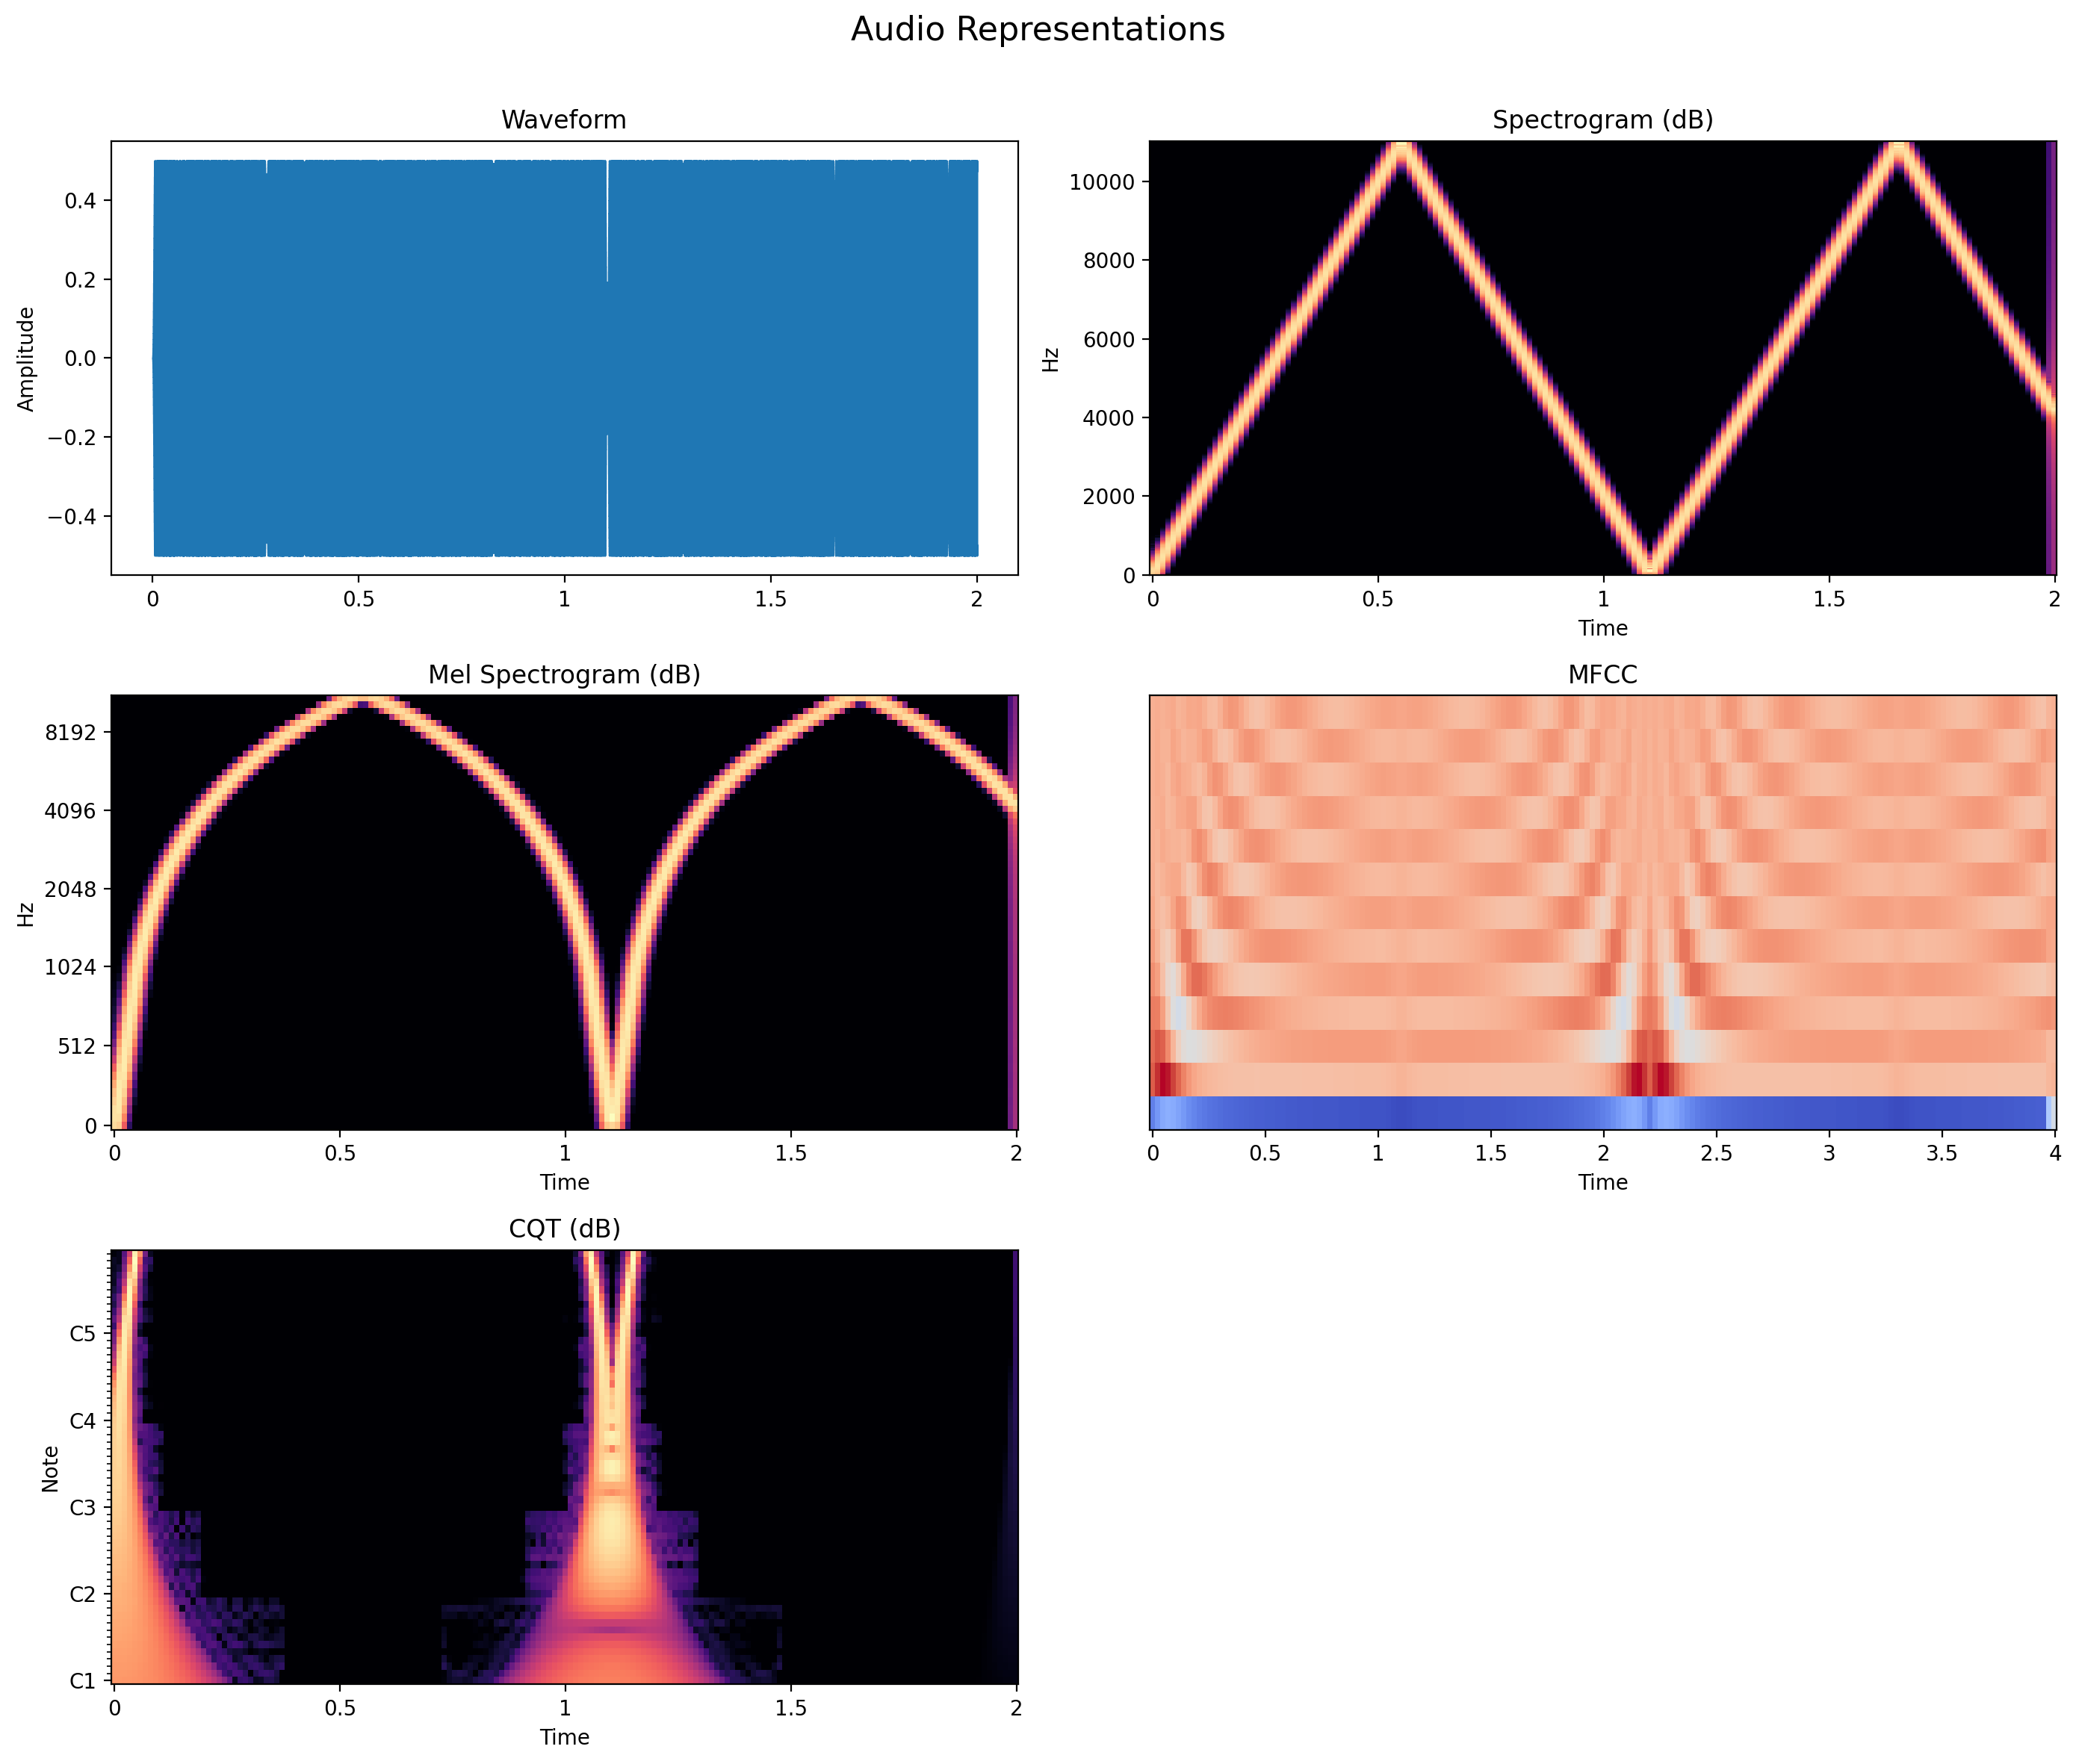

In [6]:
import numpy as np
import librosa

import matplotlib.pyplot as plt
import librosa.display

# Generate a test audio signal (sine wave + harmonics)
sr = 22050  # sample rate
duration = 2.0  # seconds
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
f_start = 0
f_end = 20000
audio = 0.5 * np.sin(2 * np.pi * ((f_start + (f_end - f_start) * t / duration) * t))

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Audio Representations', fontsize=16)

# Waveform
librosa.display.waveshow(audio, sr=sr, ax=axs[0, 0])
axs[0, 0].set_title('Waveform')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Amplitude')

# Spectrogram
S = np.abs(librosa.stft(audio, n_fft=1024, hop_length=256))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, hop_length=256, x_axis='time', y_axis='hz', ax=axs[0, 1])
axs[0, 1].set_title('Spectrogram (dB)')

# Mel Spectrogram
S_mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024, hop_length=256, n_mels=64)
librosa.display.specshow(librosa.power_to_db(S_mel, ref=np.max), sr=sr, hop_length=256, x_axis='time', y_axis='mel', ax=axs[1, 0])
axs[1, 0].set_title('Mel Spectrogram (dB)')

# MFCC
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, n_fft=1024, hop_length=256)
librosa.display.specshow(mfccs, x_axis='time', ax=axs[1, 1])
axs[1, 1].set_title('MFCC')

# CQT
C = np.abs(librosa.cqt(audio, sr=sr, hop_length=256, n_bins=60))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, hop_length=256, x_axis='time', y_axis='cqt_note', ax=axs[2, 0])
axs[2, 0].set_title('CQT (dB)')

# Hide the last empty subplot
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Symbolic Representations

Symbolic representations are structured, human- and machine-readable formats that encode musical information such as pitch, rhythm, dynamics, and articulation. These representations are essential for music analysis, composition, generation, and interoperability between software tools. Below are some of the most widely used symbolic formats:

### MIDI
[MIDI](https://en.wikipedia.org/wiki/MIDI) (Musical Instrument Digital Interface) is a standard protocol for communicating musical performance data between electronic instruments and computers. It encodes information such as note pitch, velocity (how hard a note is played), duration, instrument type, and control changes (e.g., modulation, sustain pedal). MIDI files do not contain actual audio but rather instructions for how music should be played, making them compact and widely compatible. MIDI is the backbone of most digital music production environments and is used for sequencing, editing, and playback.

**Key features:**
- Encodes note events (on/off), pitch, velocity, and timing.
- Supports multiple channels (instruments) and tracks.
- Widely supported by DAWs, synthesizers, and notation software.

### ABC Notation
[ABC Notation](https://en.wikipedia.org/wiki/ABC_notation) is a text-based music notation system that uses ASCII characters to represent musical scores. It is especially popular for folk and traditional music due to its simplicity and ease of sharing via plain text. ABC notation can encode melody, rhythm, lyrics, and basic chords.

**Key features:**
- Human-readable and easy to edit in any text editor.
- Supports simple melodies, chords, and lyrics.
- Many online tools exist for converting ABC to sheet music or MIDI.

### REMI
[REMI](https://arxiv.org/abs/2002.00212) (REvamped MIDI-derived events) is an enhanced representation of MIDI data designed for deep learning-based music generation. REMI introduces additional event types such as Note Duration, Bar, Position, and Tempo, allowing for a more structured and musically meaningful encoding of rhythm and meter.

**Key features:**
- Designed for symbolic music generation with neural networks.
- Encodes timing, structure, and expressive elements.
- Facilitates learning of musical form and rhythm.

### MusicXML
[MusicXML](https://en.wikipedia.org/wiki/MusicXML) is an XML-based format for representing Western music notation. It encodes detailed musical elements such as notes, rests, articulations, dynamics, lyrics, and layout information. MusicXML is ideal for sharing, analyzing, and archiving sheet music, and is supported by most notation software.

**Key features:**
- Encodes full sheet music, including layout and expressive markings.
- Supports complex scores with multiple staves, voices, and instruments.
- Enables interoperability between notation programs (e.g., Finale, Sibelius, MuseScore).

### Piano Roll
The [Piano Roll](https://en.wikipedia.org/wiki/Piano_roll) is a visual representation of music, where time is displayed on the horizontal axis and pitch on the vertical axis. Notes are shown as rectangles, with their position indicating onset, their length indicating duration, and their vertical placement indicating pitch. Piano rolls are commonly used in DAWs for editing MIDI data and visualizing performances.

**Key features:**
- Intuitive, graphical interface for editing MIDI notes.
- Useful for sequencing, quantization, and visualization.
- Does not encode expressive markings or complex notation.

### Note Graph
A [Note Graph](https://arxiv.org/abs/2006.05417) is a graph-based representation of musical scores, where nodes represent notes and edges capture relationships such as sequence, onset, and sustain. This approach provides a structured way to analyze and model complex musical relationships, such as polyphony, voice leading, and harmonic context.

**Key features:**
- Captures relationships between notes beyond simple sequences.
- Useful for music analysis, generation, and machine learning.
- Enables modeling of complex structures like counterpoint and harmony.

---

**Summary Table**

| Representation | Type         | Typical Use Cases                    | Strengths                          |
|----------------|--------------|--------------------------------------|------------------------------------|
| MIDI           | Event-based  | Sequencing, playback, editing        | Compact, widely supported          |
| ABC Notation   | Text-based   | Folk/traditional music, sharing      | Simple, human-readable             |
| REMI           | Event-based  | AI music generation                  | Structured, rhythm-aware           |
| MusicXML       | XML-based    | Sheet music, notation, analysis      | Detailed, expressive, interoperable|
| Piano Roll     | Visual       | MIDI editing, sequencing             | Intuitive, easy to manipulate      |
| Note Graph     | Graph-based  | Analysis, AI, complex relationships  | Captures structure and context     |

## Questions

1. What is the difference between a tone and a note in music psychology?
2. How does a spectrogram differ from a waveform in audio visualization?
3. What is the purpose of the Mel Spectrogram and why is it perceptually relevant?
4. Describe the concept of harmony and how technology can be used to analyze it.
5. What are the main differences between symbolic representations such as MIDI, ABC Notation, and MusicXML?
